# Carregando os dados

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

df = pd.read_csv("delivery_alimentos.csv")
df

ModuleNotFoundError: No module named 'sklearn'

# Análise dos dados

## Verificando nulos

In [2]:
def check_nulls():
  number_nulls = df.isnull().sum()
  print("Número de nulos por coluna:\n")
  print(number_nulls, '\n')

In [3]:
check_nulls()

Número de nulos por coluna:

Unnamed: 0                  0
reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion     3361
at                          0
replyContent            27020
repliedAt               27020
appVersion               3361
sortOrder                   0
appId                       0
dtype: int64 



## Contando palavras

In [4]:
df['word_count'] = df['content'].str.split().apply(len)
df['word_count']

0        81
1        77
2        71
3        55
4        95
         ..
35977     5
35978     2
35979     5
35980     2
35981    28
Name: word_count, Length: 35982, dtype: int64

In [5]:
df['word_count'].min()

1

In [6]:
df['word_count'].mean()

28.090712022678005

In [7]:
df['word_count'].max()

350

<Axes: xlabel='word_count', ylabel='Count'>

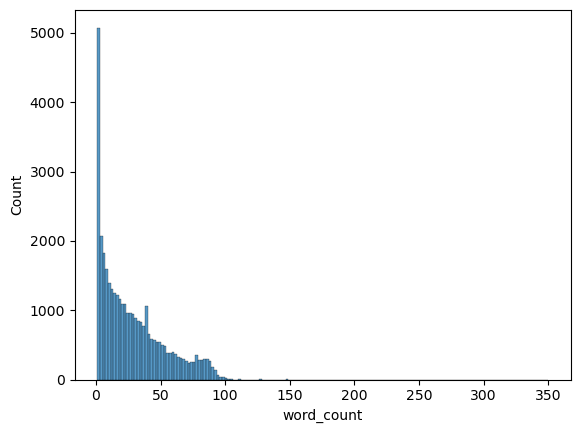

In [8]:
import seaborn as sns

sns.histplot(data = df, x = 'word_count')

In [9]:
def count_words(text_column):
  df['word_count'] = df[text_column].str.split().apply(len)

  min = df['word_count'].min()
  mean = df['word_count'].mean()
  max = df['word_count'].max()

  print("O número mínimo de palavras no dataset é:", min)
  print("A média de palavras no dataset é:", mean)
  print("O número máximo de palavras no dataset é:", max)

  print("\nHistograma da frequência do número de palavras")
  sns.histplot(data = df, x = 'word_count')
  plt.show()

O número mínimo de palavras no dataset é: 1
A média de palavras no dataset é: 28.090712022678005
O número máximo de palavras no dataset é: 350

Histograma da frequência do número de palavras


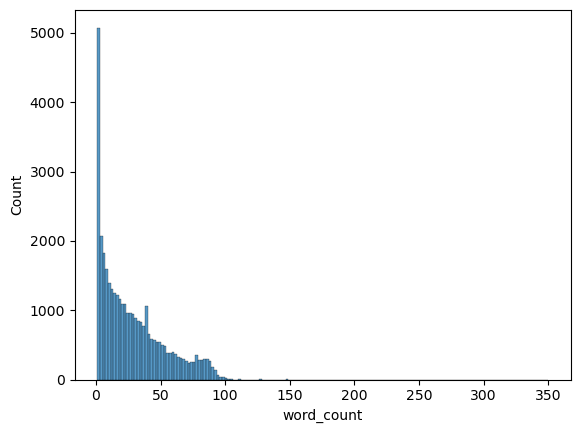

In [10]:
count_words('content')

## Verificando a distribuição dos scores

In [11]:
score_counts = df['score'].value_counts()
score_counts

score
4    9000
5    9000
1    5994
2    5994
3    5994
Name: count, dtype: int64

<Axes: xlabel='score', ylabel='Count'>

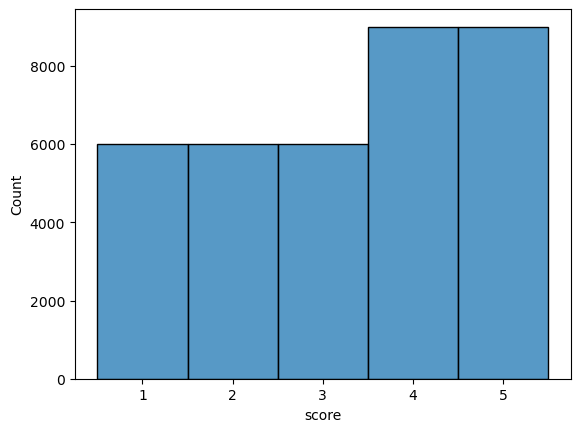

In [12]:
sns.histplot(data = df, x = 'score', discrete = True)

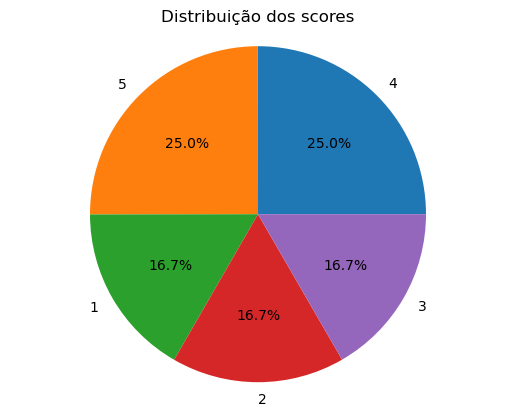

In [13]:
import matplotlib.pyplot as plt

plt.pie(score_counts, labels = score_counts.index, autopct = '%1.1f%%')
plt.title("Distribuição dos scores")
plt.axis('equal')
plt.show()

In [14]:
def class_distribution(class_column):
  class_counts = df[class_column].value_counts()

  print("Número de instâncias por classe")
  print(class_counts)

  print("\nHistograma da distribuição das classes")
  sns.histplot(data = df, x = class_column, discrete = True)
  plt.show()

  print("\nGráfico de pizza da distribuição das classes")
  plt.pie(class_counts, labels = class_counts.index, autopct = '%1.1f%%')
  plt.title("Distribuição das classes")
  plt.axis('equal')
  plt.show()

Número de instâncias por classe
score
4    9000
5    9000
1    5994
2    5994
3    5994
Name: count, dtype: int64

Histograma da distribuição das classes


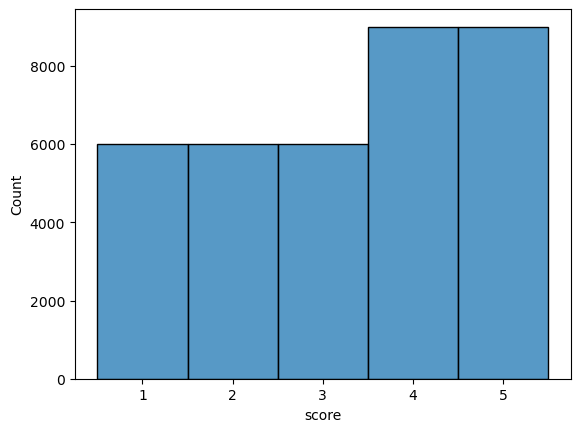


Gráfico de pizza da distribuição das classes


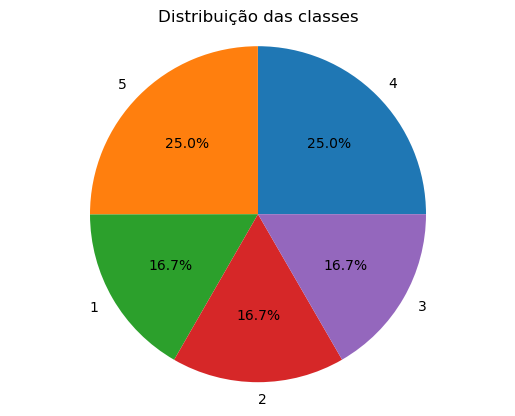

In [15]:
class_distribution('score')

## Palavras mais frequentes

In [16]:
from collections import Counter

all_text = ' '.join(df['content'])
words = all_text.split()
word_count = Counter(words)

number_words = 10

most_common_words = word_count.most_common(number_words)
most_common_words_df = pd.DataFrame(most_common_words, columns = ['Palavra', 'Frequência'])
most_common_words_df

,Palavra,Frequência
0,o,34379
1,de,32419
2,e,30626
3,que,24527
4,não,22092
5,a,19925
6,é,12873
7,com,10660
8,do,10532
9,um,9547


In [17]:
def most_frequency_words(df, text_column, number_words = 10):
  all_text = ' '.join(df[text_column])
  words = all_text.split()
  word_count = Counter(words)

  print("\nPalavras mais frequentes")
  most_common_words = word_count.most_common(number_words)
  most_common_words_df = pd.DataFrame(most_common_words, columns = ['Palavra', 'Frequência'])
  display(most_common_words_df)

In [18]:
most_frequency_words(df, 'content')


Palavras mais frequentes


,Palavra,Frequência
0,o,34379
1,de,32419
2,e,30626
3,que,24527
4,não,22092
5,a,19925
6,é,12873
7,com,10660
8,do,10532
9,um,9547


## Palavras mais frequentes por classe

In [19]:
for class_label in df['score'].unique():
  class_df = df[df['score'] == class_label]

  print("\nPalavras mais frequentes para a classe", class_label)
  most_frequency_words(class_df, 'content')


Palavras mais frequentes para a classe 1

Palavras mais frequentes


,Palavra,Frequência
0,o,8542
1,e,7476
2,de,6939
3,não,6575
4,que,5650
5,a,4309
6,com,2598
7,um,2510
8,no,2379
9,do,2304



Palavras mais frequentes para a classe 2

Palavras mais frequentes


,Palavra,Frequência
0,o,7796
1,de,6708
2,e,6304
3,não,5618
4,que,5422
5,a,4260
6,é,2541
7,com,2266
8,do,2175
9,no,2090



Palavras mais frequentes para a classe 3

Palavras mais frequentes


,Palavra,Frequência
0,o,6622
1,de,6108
2,e,5261
3,que,4784
4,não,4261
5,a,4069
6,é,2659
7,do,2026
8,com,1896
9,no,1882



Palavras mais frequentes para a classe 4

Palavras mais frequentes


,Palavra,Frequência
0,de,7215
1,o,6784
2,e,5794
3,que,5161
4,a,4445
5,não,3844
6,é,3429
7,do,2372
8,muito,2258
9,mais,2037



Palavras mais frequentes para a classe 5

Palavras mais frequentes


,Palavra,Frequência
0,e,5791
1,de,5449
2,o,4635
3,que,3510
4,a,2842
5,muito,2435
6,é,2119
7,com,1903
8,não,1794
9,do,1655


In [20]:
def most_frequency_words_by_class(text_column, class_column):
  for class_label in df[class_column].unique():
    class_df = df[df[class_column] == class_label]

    print("\nPalavras mais frequentes para a classe", class_label)
    most_frequency_words(class_df, text_column)

In [21]:
most_frequency_words_by_class('content', 'score')


Palavras mais frequentes para a classe 1

Palavras mais frequentes


,Palavra,Frequência
0,o,8542
1,e,7476
2,de,6939
3,não,6575
4,que,5650
5,a,4309
6,com,2598
7,um,2510
8,no,2379
9,do,2304



Palavras mais frequentes para a classe 2

Palavras mais frequentes


,Palavra,Frequência
0,o,7796
1,de,6708
2,e,6304
3,não,5618
4,que,5422
5,a,4260
6,é,2541
7,com,2266
8,do,2175
9,no,2090



Palavras mais frequentes para a classe 3

Palavras mais frequentes


,Palavra,Frequência
0,o,6622
1,de,6108
2,e,5261
3,que,4784
4,não,4261
5,a,4069
6,é,2659
7,do,2026
8,com,1896
9,no,1882



Palavras mais frequentes para a classe 4

Palavras mais frequentes


,Palavra,Frequência
0,de,7215
1,o,6784
2,e,5794
3,que,5161
4,a,4445
5,não,3844
6,é,3429
7,do,2372
8,muito,2258
9,mais,2037



Palavras mais frequentes para a classe 5

Palavras mais frequentes


,Palavra,Frequência
0,e,5791
1,de,5449
2,o,4635
3,que,3510
4,a,2842
5,muito,2435
6,é,2119
7,com,1903
8,não,1794
9,do,1655


## WordCloud

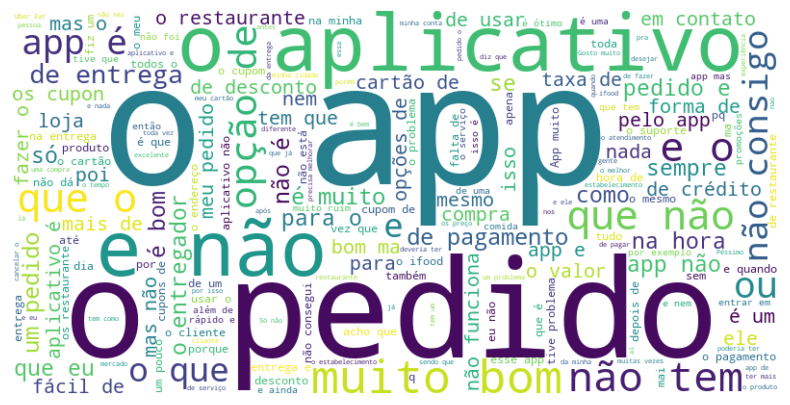

In [22]:
from wordcloud import WordCloud

all_text = ' '.join(df['content'])

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [23]:
def word_cloud(text_column):
  all_text = ' '.join(df[text_column])

  print("\nWordCloud")
  wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(all_text)

  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()


WordCloud


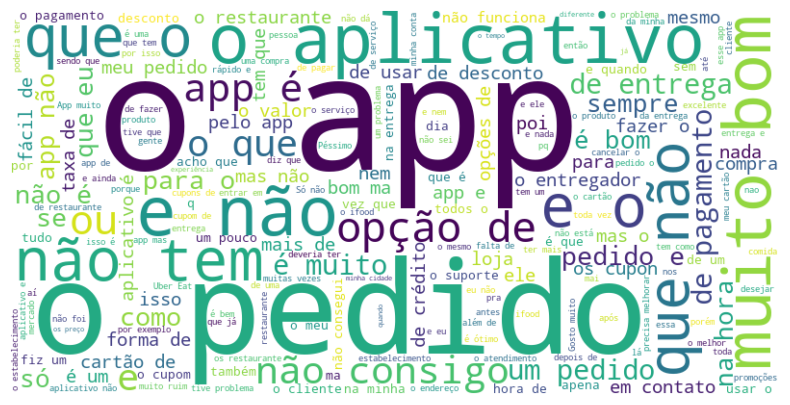

In [24]:
word_cloud('content')

## Juntando todas as funções de análise de dados

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

def data_analytics(df, text_column, class_column):
  check_nulls()
  count_words(text_column)
  class_distribution(class_column)
  most_frequency_words(df, text_column)
  most_frequency_words_by_class(text_column, class_column)
  word_cloud(text_column)

Número de nulos por coluna:

Unnamed: 0                  0
reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion     3361
at                          0
replyContent            27020
repliedAt               27020
appVersion               3361
sortOrder                   0
appId                       0
word_count                  0
dtype: int64 

O número mínimo de palavras no dataset é: 1
A média de palavras no dataset é: 28.090712022678005
O número máximo de palavras no dataset é: 350

Histograma da frequência do número de palavras


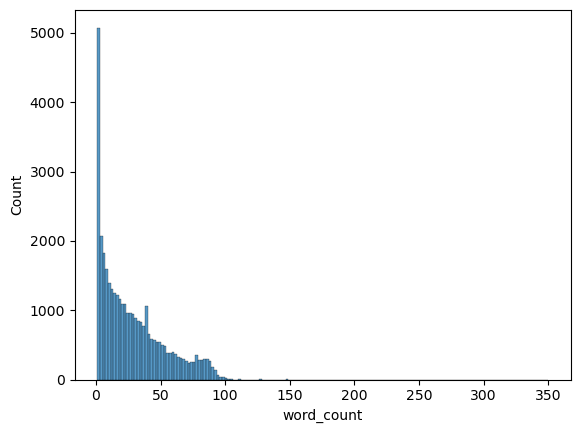

Número de instâncias por classe
score
4    9000
5    9000
1    5994
2    5994
3    5994
Name: count, dtype: int64

Histograma da distribuição das classes


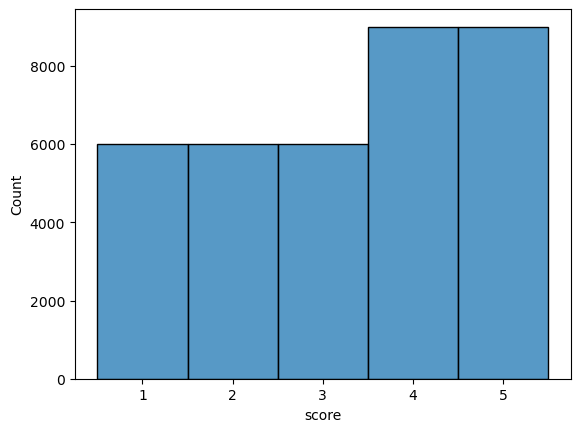


Gráfico de pizza da distribuição das classes


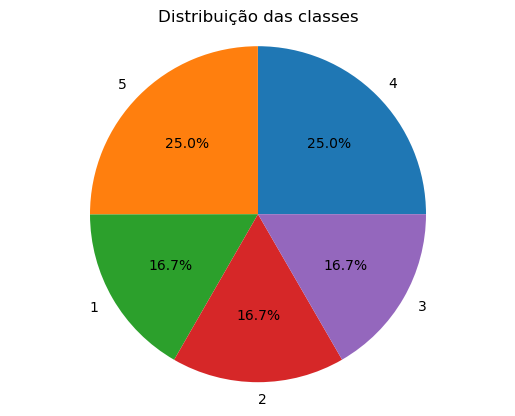


Palavras mais frequentes


,Palavra,Frequência
0,o,34379
1,de,32419
2,e,30626
3,que,24527
4,não,22092
5,a,19925
6,é,12873
7,com,10660
8,do,10532
9,um,9547



Palavras mais frequentes para a classe 1

Palavras mais frequentes


,Palavra,Frequência
0,o,8542
1,e,7476
2,de,6939
3,não,6575
4,que,5650
5,a,4309
6,com,2598
7,um,2510
8,no,2379
9,do,2304



Palavras mais frequentes para a classe 2

Palavras mais frequentes


,Palavra,Frequência
0,o,7796
1,de,6708
2,e,6304
3,não,5618
4,que,5422
5,a,4260
6,é,2541
7,com,2266
8,do,2175
9,no,2090



Palavras mais frequentes para a classe 3

Palavras mais frequentes


,Palavra,Frequência
0,o,6622
1,de,6108
2,e,5261
3,que,4784
4,não,4261
5,a,4069
6,é,2659
7,do,2026
8,com,1896
9,no,1882



Palavras mais frequentes para a classe 4

Palavras mais frequentes


,Palavra,Frequência
0,de,7215
1,o,6784
2,e,5794
3,que,5161
4,a,4445
5,não,3844
6,é,3429
7,do,2372
8,muito,2258
9,mais,2037



Palavras mais frequentes para a classe 5

Palavras mais frequentes


,Palavra,Frequência
0,e,5791
1,de,5449
2,o,4635
3,que,3510
4,a,2842
5,muito,2435
6,é,2119
7,com,1903
8,não,1794
9,do,1655



WordCloud


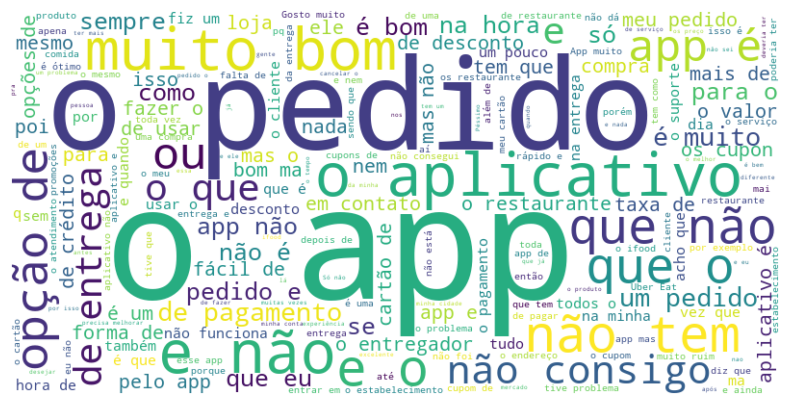

In [26]:
data_analytics(df, 'content', 'score')

# Pré-processamento

## Removendo textos longos

In [27]:
df = df[df['word_count'] <= 150]
df

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,word_count
0,0,2cf8d528-4be9-4582-8029-b12c7853ba9c,Daniela Aguilar,https://play-lh.googleusercontent.com/a-/ALV-U...,Fiz um pedido e veio com um item faltando. Ao ...,1,252,9.223.0,2023-09-09 02:48:00,NaN,NaN,9.223.0,most_relevant,br.com.brainweb.ifood,81
1,1,a0aefee6-4c2b-4d87-86d6-45ea111dcf50,Arlan Cruz (Miguelito),https://play-lh.googleusercontent.com/a-/ALV-U...,Informações do produto e imagens sem clareza. ...,1,173,9.223.0,2023-09-10 00:24:00,NaN,NaN,9.223.0,most_relevant,br.com.brainweb.ifood,77
2,2,4b28558b-23e9-4e14-96b6-6e0e936f1ff1,Gabriel Liondas,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uso o aplicativo a um bom tempo, porém, tive u...",1,12,9.222.1,2023-09-09 16:46:25,NaN,NaN,9.222.1,most_relevant,br.com.brainweb.ifood,71
3,3,a7d610c9-30aa-4f8b-9a14-142ca9ec3b15,Ester Araújo,https://play-lh.googleusercontent.com/a-/ALV-U...,Não tem mais preocupação com qualidade. Os ent...,1,32,9.221.0,2023-08-31 21:14:46,NaN,NaN,9.221.0,most_relevant,br.com.brainweb.ifood,55
4,4,9c203cc4-289f-46cf-b55a-6332791b3b8c,Adr_Alv,https://play-lh.googleusercontent.com/a-/ALV-U...,"Não aparece mais cupons, a mais de 7 meses par...",1,14,9.222.1,2023-09-08 14:40:36,NaN,NaN,9.222.1,most_relevant,br.com.brainweb.ifood,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,35977,785b13d8-ccc9-4629-b844-557f90d4d734,Lais De Lima,https://play-lh.googleusercontent.com/a/ACg8oc...,Muito bom amei esse app,5,0,10.0.0,2023-07-15 18:45:03,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,5
35978,35978,c2121839-7857-49c9-9609-27aed288d297,Marta Silva,https://play-lh.googleusercontent.com/a-/ALV-U...,Muito bom,5,0,10.0.0,2023-07-15 15:56:29,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,2
35979,35979,b5286f42-23a0-408c-9fc4-5c0f069e950a,Bp Santos,https://play-lh.googleusercontent.com/a/ACg8oc...,Ótimo pra todo momento www.aiqfome.com,5,0,10.0.0,2023-07-15 03:09:38,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,5
35980,35980,b31c7352-1b90-4caf-81d7-e0e2ae9b44d5,Mauro Cesar,https://play-lh.googleusercontent.com/a-/ALV-U...,Top 🤝🏻,5,0,10.0.0,2023-07-15 00:42:34,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,2


## Removendo emojis

In [28]:
import re

def remove_emojis(text):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # símbolos & pictogramas
                           u"\U0001F680-\U0001F6FF"  # transportes e símbolos
                           u"\U0001F700-\U0001F77F"  # símbolos alquímicos
                           u"\U0001F780-\U0001F7FF"  # símbolos geométricos
                           u"\U0001F800-\U0001F8FF"  # suplemento de símbolos e pictogramas
                           u"\U0001F900-\U0001F9FF"  # emoticons adicionais
                           u"\U0001FA00-\U0001FA6F"  # objetos diversos
                           u"\U0001FA70-\U0001FAFF"  # símbolos diversos
                           u"\U0001F004"              # símbolo de cartão de jogo
                           u"\U0001F0CF"              # símbolo do baralho
                           u"\U0001F170-\U0001F251"  # emojis de letras (variante)
                           u"\U00002702-\U000027B0"  # símbolos diversos
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
  return emoji_pattern.sub(r'', text)

df['removed_emoji'] = df['content'].apply(remove_emojis)
df

/var/folders/z4/qjsljsws0c3bccyrhw2css6c0000gn/T/ipykernel_35980/3864498224.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['removed_emoji'] = df['content'].apply(remove_emojis)


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,word_count,removed_emoji
0,0,2cf8d528-4be9-4582-8029-b12c7853ba9c,Daniela Aguilar,https://play-lh.googleusercontent.com/a-/ALV-U...,Fiz um pedido e veio com um item faltando. Ao ...,1,252,9.223.0,2023-09-09 02:48:00,NaN,NaN,9.223.0,most_relevant,br.com.brainweb.ifood,81,Fiz um pedido e veio com um item faltando. Ao ...
1,1,a0aefee6-4c2b-4d87-86d6-45ea111dcf50,Arlan Cruz (Miguelito),https://play-lh.googleusercontent.com/a-/ALV-U...,Informações do produto e imagens sem clareza. ...,1,173,9.223.0,2023-09-10 00:24:00,NaN,NaN,9.223.0,most_relevant,br.com.brainweb.ifood,77,Informações do produto e imagens sem clareza. ...
2,2,4b28558b-23e9-4e14-96b6-6e0e936f1ff1,Gabriel Liondas,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uso o aplicativo a um bom tempo, porém, tive u...",1,12,9.222.1,2023-09-09 16:46:25,NaN,NaN,9.222.1,most_relevant,br.com.brainweb.ifood,71,"Uso o aplicativo a um bom tempo, porém, tive u..."
3,3,a7d610c9-30aa-4f8b-9a14-142ca9ec3b15,Ester Araújo,https://play-lh.googleusercontent.com/a-/ALV-U...,Não tem mais preocupação com qualidade. Os ent...,1,32,9.221.0,2023-08-31 21:14:46,NaN,NaN,9.221.0,most_relevant,br.com.brainweb.ifood,55,Não tem mais preocupação com qualidade. Os ent...
4,4,9c203cc4-289f-46cf-b55a-6332791b3b8c,Adr_Alv,https://play-lh.googleusercontent.com/a-/ALV-U...,"Não aparece mais cupons, a mais de 7 meses par...",1,14,9.222.1,2023-09-08 14:40:36,NaN,NaN,9.222.1,most_relevant,br.com.brainweb.ifood,95,"Não aparece mais cupons, a mais de 7 meses par..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,35977,785b13d8-ccc9-4629-b844-557f90d4d734,Lais De Lima,https://play-lh.googleusercontent.com/a/ACg8oc...,Muito bom amei esse app,5,0,10.0.0,2023-07-15 18:45:03,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,5,Muito bom amei esse app
35978,35978,c2121839-7857-49c9-9609-27aed288d297,Marta Silva,https://play-lh.googleusercontent.com/a-/ALV-U...,Muito bom,5,0,10.0.0,2023-07-15 15:56:29,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,2,Muito bom
35979,35979,b5286f42-23a0-408c-9fc4-5c0f069e950a,Bp Santos,https://play-lh.googleusercontent.com/a/ACg8oc...,Ótimo pra todo momento www.aiqfome.com,5,0,10.0.0,2023-07-15 03:09:38,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,5,Ótimo pra todo momento www.aiqfome.com
35980,35980,b31c7352-1b90-4caf-81d7-e0e2ae9b44d5,Mauro Cesar,https://play-lh.googleusercontent.com/a-/ALV-U...,Top 🤝🏻,5,0,10.0.0,2023-07-15 00:42:34,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,2,Top


## Removendo links

In [29]:
def remove_link(text):
  text_without_links = re.sub(r'www\S+|http\S+|ftp\S+', '', text)
  return text_without_links

df['removed_links'] = df['removed_emoji'].apply(remove_link)
df

/var/folders/z4/qjsljsws0c3bccyrhw2css6c0000gn/T/ipykernel_35980/1135971876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['removed_links'] = df['removed_emoji'].apply(remove_link)


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,word_count,removed_emoji,removed_links
0,0,2cf8d528-4be9-4582-8029-b12c7853ba9c,Daniela Aguilar,https://play-lh.googleusercontent.com/a-/ALV-U...,Fiz um pedido e veio com um item faltando. Ao ...,1,252,9.223.0,2023-09-09 02:48:00,NaN,NaN,9.223.0,most_relevant,br.com.brainweb.ifood,81,Fiz um pedido e veio com um item faltando. Ao ...,Fiz um pedido e veio com um item faltando. Ao ...
1,1,a0aefee6-4c2b-4d87-86d6-45ea111dcf50,Arlan Cruz (Miguelito),https://play-lh.googleusercontent.com/a-/ALV-U...,Informações do produto e imagens sem clareza. ...,1,173,9.223.0,2023-09-10 00:24:00,NaN,NaN,9.223.0,most_relevant,br.com.brainweb.ifood,77,Informações do produto e imagens sem clareza. ...,Informações do produto e imagens sem clareza. ...
2,2,4b28558b-23e9-4e14-96b6-6e0e936f1ff1,Gabriel Liondas,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uso o aplicativo a um bom tempo, porém, tive u...",1,12,9.222.1,2023-09-09 16:46:25,NaN,NaN,9.222.1,most_relevant,br.com.brainweb.ifood,71,"Uso o aplicativo a um bom tempo, porém, tive u...","Uso o aplicativo a um bom tempo, porém, tive u..."
3,3,a7d610c9-30aa-4f8b-9a14-142ca9ec3b15,Ester Araújo,https://play-lh.googleusercontent.com/a-/ALV-U...,Não tem mais preocupação com qualidade. Os ent...,1,32,9.221.0,2023-08-31 21:14:46,NaN,NaN,9.221.0,most_relevant,br.com.brainweb.ifood,55,Não tem mais preocupação com qualidade. Os ent...,Não tem mais preocupação com qualidade. Os ent...
4,4,9c203cc4-289f-46cf-b55a-6332791b3b8c,Adr_Alv,https://play-lh.googleusercontent.com/a-/ALV-U...,"Não aparece mais cupons, a mais de 7 meses par...",1,14,9.222.1,2023-09-08 14:40:36,NaN,NaN,9.222.1,most_relevant,br.com.brainweb.ifood,95,"Não aparece mais cupons, a mais de 7 meses par...","Não aparece mais cupons, a mais de 7 meses par..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,35977,785b13d8-ccc9-4629-b844-557f90d4d734,Lais De Lima,https://play-lh.googleusercontent.com/a/ACg8oc...,Muito bom amei esse app,5,0,10.0.0,2023-07-15 18:45:03,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,5,Muito bom amei esse app,Muito bom amei esse app
35978,35978,c2121839-7857-49c9-9609-27aed288d297,Marta Silva,https://play-lh.googleusercontent.com/a-/ALV-U...,Muito bom,5,0,10.0.0,2023-07-15 15:56:29,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,2,Muito bom,Muito bom
35979,35979,b5286f42-23a0-408c-9fc4-5c0f069e950a,Bp Santos,https://play-lh.googleusercontent.com/a/ACg8oc...,Ótimo pra todo momento www.aiqfome.com,5,0,10.0.0,2023-07-15 03:09:38,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,5,Ótimo pra todo momento www.aiqfome.com,Ótimo pra todo momento
35980,35980,b31c7352-1b90-4caf-81d7-e0e2ae9b44d5,Mauro Cesar,https://play-lh.googleusercontent.com/a-/ALV-U...,Top 🤝🏻,5,0,10.0.0,2023-07-15 00:42:34,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,2,Top,Top


## Tokenizando

In [30]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenize_text(text):
  tokens = word_tokenize(text)
  return tokens

df['tokens'] = df['removed_links'].apply(tokenize_text)
df

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/data_science_br/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/z4/qjsljsws0c3bccyrhw2css6c0000gn/T/ipykernel_35980/2652389808.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['removed_links'].apply(tokenize_text)


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,word_count,removed_emoji,removed_links,tokens
0,0,2cf8d528-4be9-4582-8029-b12c7853ba9c,Daniela Aguilar,https://play-lh.googleusercontent.com/a-/ALV-U...,Fiz um pedido e veio com um item faltando. Ao ...,1,252,9.223.0,2023-09-09 02:48:00,NaN,NaN,9.223.0,most_relevant,br.com.brainweb.ifood,81,Fiz um pedido e veio com um item faltando. Ao ...,Fiz um pedido e veio com um item faltando. Ao ...,"[Fiz, um, pedido, e, veio, com, um, item, falt..."
1,1,a0aefee6-4c2b-4d87-86d6-45ea111dcf50,Arlan Cruz (Miguelito),https://play-lh.googleusercontent.com/a-/ALV-U...,Informações do produto e imagens sem clareza. ...,1,173,9.223.0,2023-09-10 00:24:00,NaN,NaN,9.223.0,most_relevant,br.com.brainweb.ifood,77,Informações do produto e imagens sem clareza. ...,Informações do produto e imagens sem clareza. ...,"[Informações, do, produto, e, imagens, sem, cl..."
2,2,4b28558b-23e9-4e14-96b6-6e0e936f1ff1,Gabriel Liondas,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uso o aplicativo a um bom tempo, porém, tive u...",1,12,9.222.1,2023-09-09 16:46:25,NaN,NaN,9.222.1,most_relevant,br.com.brainweb.ifood,71,"Uso o aplicativo a um bom tempo, porém, tive u...","Uso o aplicativo a um bom tempo, porém, tive u...","[Uso, o, aplicativo, a, um, bom, tempo, ,, por..."
3,3,a7d610c9-30aa-4f8b-9a14-142ca9ec3b15,Ester Araújo,https://play-lh.googleusercontent.com/a-/ALV-U...,Não tem mais preocupação com qualidade. Os ent...,1,32,9.221.0,2023-08-31 21:14:46,NaN,NaN,9.221.0,most_relevant,br.com.brainweb.ifood,55,Não tem mais preocupação com qualidade. Os ent...,Não tem mais preocupação com qualidade. Os ent...,"[Não, tem, mais, preocupação, com, qualidade, ..."
4,4,9c203cc4-289f-46cf-b55a-6332791b3b8c,Adr_Alv,https://play-lh.googleusercontent.com/a-/ALV-U...,"Não aparece mais cupons, a mais de 7 meses par...",1,14,9.222.1,2023-09-08 14:40:36,NaN,NaN,9.222.1,most_relevant,br.com.brainweb.ifood,95,"Não aparece mais cupons, a mais de 7 meses par...","Não aparece mais cupons, a mais de 7 meses par...","[Não, aparece, mais, cupons, ,, a, mais, de, 7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,35977,785b13d8-ccc9-4629-b844-557f90d4d734,Lais De Lima,https://play-lh.googleusercontent.com/a/ACg8oc...,Muito bom amei esse app,5,0,10.0.0,2023-07-15 18:45:03,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,5,Muito bom amei esse app,Muito bom amei esse app,"[Muito, bom, amei, esse, app]"
35978,35978,c2121839-7857-49c9-9609-27aed288d297,Marta Silva,https://play-lh.googleusercontent.com/a-/ALV-U...,Muito bom,5,0,10.0.0,2023-07-15 15:56:29,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,2,Muito bom,Muito bom,"[Muito, bom]"
35979,35979,b5286f42-23a0-408c-9fc4-5c0f069e950a,Bp Santos,https://play-lh.googleusercontent.com/a/ACg8oc...,Ótimo pra todo momento www.aiqfome.com,5,0,10.0.0,2023-07-15 03:09:38,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,5,Ótimo pra todo momento www.aiqfome.com,Ótimo pra todo momento,"[Ótimo, pra, todo, momento]"
35980,35980,b31c7352-1b90-4caf-81d7-e0e2ae9b44d5,Mauro Cesar,https://play-lh.googleusercontent.com/a-/ALV-U...,Top 🤝🏻,5,0,10.0.0,2023-07-15 00:42:34,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,2,Top,Top,[Top]


## Convertendo para minúscula

In [31]:
def lowercase(tokens):
  lowercase_tokens = [token.lower() for token in tokens]
  return lowercase_tokens

df['tokens_lowercase'] = df['tokens'].apply(lowercase)
df

/var/folders/z4/qjsljsws0c3bccyrhw2css6c0000gn/T/ipykernel_35980/3772410232.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens_lowercase'] = df['tokens'].apply(lowercase)


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,word_count,removed_emoji,removed_links,tokens,tokens_lowercase
0,0,2cf8d528-4be9-4582-8029-b12c7853ba9c,Daniela Aguilar,https://play-lh.googleusercontent.com/a-/ALV-U...,Fiz um pedido e veio com um item faltando. Ao ...,1,252,9.223.0,2023-09-09 02:48:00,NaN,NaN,9.223.0,most_relevant,br.com.brainweb.ifood,81,Fiz um pedido e veio com um item faltando. Ao ...,Fiz um pedido e veio com um item faltando. Ao ...,"[Fiz, um, pedido, e, veio, com, um, item, falt...","[fiz, um, pedido, e, veio, com, um, item, falt..."
1,1,a0aefee6-4c2b-4d87-86d6-45ea111dcf50,Arlan Cruz (Miguelito),https://play-lh.googleusercontent.com/a-/ALV-U...,Informações do produto e imagens sem clareza. ...,1,173,9.223.0,2023-09-10 00:24:00,NaN,NaN,9.223.0,most_relevant,br.com.brainweb.ifood,77,Informações do produto e imagens sem clareza. ...,Informações do produto e imagens sem clareza. ...,"[Informações, do, produto, e, imagens, sem, cl...","[informações, do, produto, e, imagens, sem, cl..."
2,2,4b28558b-23e9-4e14-96b6-6e0e936f1ff1,Gabriel Liondas,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uso o aplicativo a um bom tempo, porém, tive u...",1,12,9.222.1,2023-09-09 16:46:25,NaN,NaN,9.222.1,most_relevant,br.com.brainweb.ifood,71,"Uso o aplicativo a um bom tempo, porém, tive u...","Uso o aplicativo a um bom tempo, porém, tive u...","[Uso, o, aplicativo, a, um, bom, tempo, ,, por...","[uso, o, aplicativo, a, um, bom, tempo, ,, por..."
3,3,a7d610c9-30aa-4f8b-9a14-142ca9ec3b15,Ester Araújo,https://play-lh.googleusercontent.com/a-/ALV-U...,Não tem mais preocupação com qualidade. Os ent...,1,32,9.221.0,2023-08-31 21:14:46,NaN,NaN,9.221.0,most_relevant,br.com.brainweb.ifood,55,Não tem mais preocupação com qualidade. Os ent...,Não tem mais preocupação com qualidade. Os ent...,"[Não, tem, mais, preocupação, com, qualidade, ...","[não, tem, mais, preocupação, com, qualidade, ..."
4,4,9c203cc4-289f-46cf-b55a-6332791b3b8c,Adr_Alv,https://play-lh.googleusercontent.com/a-/ALV-U...,"Não aparece mais cupons, a mais de 7 meses par...",1,14,9.222.1,2023-09-08 14:40:36,NaN,NaN,9.222.1,most_relevant,br.com.brainweb.ifood,95,"Não aparece mais cupons, a mais de 7 meses par...","Não aparece mais cupons, a mais de 7 meses par...","[Não, aparece, mais, cupons, ,, a, mais, de, 7...","[não, aparece, mais, cupons, ,, a, mais, de, 7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,35977,785b13d8-ccc9-4629-b844-557f90d4d734,Lais De Lima,https://play-lh.googleusercontent.com/a/ACg8oc...,Muito bom amei esse app,5,0,10.0.0,2023-07-15 18:45:03,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,5,Muito bom amei esse app,Muito bom amei esse app,"[Muito, bom, amei, esse, app]","[muito, bom, amei, esse, app]"
35978,35978,c2121839-7857-49c9-9609-27aed288d297,Marta Silva,https://play-lh.googleusercontent.com/a-/ALV-U...,Muito bom,5,0,10.0.0,2023-07-15 15:56:29,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,2,Muito bom,Muito bom,"[Muito, bom]","[muito, bom]"
35979,35979,b5286f42-23a0-408c-9fc4-5c0f069e950a,Bp Santos,https://play-lh.googleusercontent.com/a/ACg8oc...,Ótimo pra todo momento www.aiqfome.com,5,0,10.0.0,2023-07-15 03:09:38,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,5,Ótimo pra todo momento www.aiqfome.com,Ótimo pra todo momento,"[Ótimo, pra, todo, momento]","[ótimo, pra, todo, momento]"
35980,35980,b31c7352-1b90-4caf-81d7-e0e2ae9b44d5,Mauro Cesar,https://play-lh.googleusercontent.com/a-/ALV-U...,Top 🤝🏻,5,0,10.0.0,2023-07-15 00:42:34,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,2,Top,Top,[Top],[top]


## Removendo pontuações

In [32]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
def remove_punctuation(tokens):
  tokens_without_punctuation = [token for token in tokens if token not in string.punctuation]
  return tokens_without_punctuation

df['tokens_without_punctuation'] = df['tokens_lowercase'].apply(remove_punctuation)
df

/var/folders/z4/qjsljsws0c3bccyrhw2css6c0000gn/T/ipykernel_35980/2409847161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens_without_punctuation'] = df['tokens_lowercase'].apply(remove_punctuation)


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,word_count,removed_emoji,removed_links,tokens,tokens_lowercase,tokens_without_punctuation
0,0,2cf8d528-4be9-4582-8029-b12c7853ba9c,Daniela Aguilar,https://play-lh.googleusercontent.com/a-/ALV-U...,Fiz um pedido e veio com um item faltando. Ao ...,1,252,9.223.0,2023-09-09 02:48:00,NaN,NaN,9.223.0,most_relevant,br.com.brainweb.ifood,81,Fiz um pedido e veio com um item faltando. Ao ...,Fiz um pedido e veio com um item faltando. Ao ...,"[Fiz, um, pedido, e, veio, com, um, item, falt...","[fiz, um, pedido, e, veio, com, um, item, falt...","[fiz, um, pedido, e, veio, com, um, item, falt..."
1,1,a0aefee6-4c2b-4d87-86d6-45ea111dcf50,Arlan Cruz (Miguelito),https://play-lh.googleusercontent.com/a-/ALV-U...,Informações do produto e imagens sem clareza. ...,1,173,9.223.0,2023-09-10 00:24:00,NaN,NaN,9.223.0,most_relevant,br.com.brainweb.ifood,77,Informações do produto e imagens sem clareza. ...,Informações do produto e imagens sem clareza. ...,"[Informações, do, produto, e, imagens, sem, cl...","[informações, do, produto, e, imagens, sem, cl...","[informações, do, produto, e, imagens, sem, cl..."
2,2,4b28558b-23e9-4e14-96b6-6e0e936f1ff1,Gabriel Liondas,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uso o aplicativo a um bom tempo, porém, tive u...",1,12,9.222.1,2023-09-09 16:46:25,NaN,NaN,9.222.1,most_relevant,br.com.brainweb.ifood,71,"Uso o aplicativo a um bom tempo, porém, tive u...","Uso o aplicativo a um bom tempo, porém, tive u...","[Uso, o, aplicativo, a, um, bom, tempo, ,, por...","[uso, o, aplicativo, a, um, bom, tempo, ,, por...","[uso, o, aplicativo, a, um, bom, tempo, porém,..."
3,3,a7d610c9-30aa-4f8b-9a14-142ca9ec3b15,Ester Araújo,https://play-lh.googleusercontent.com/a-/ALV-U...,Não tem mais preocupação com qualidade. Os ent...,1,32,9.221.0,2023-08-31 21:14:46,NaN,NaN,9.221.0,most_relevant,br.com.brainweb.ifood,55,Não tem mais preocupação com qualidade. Os ent...,Não tem mais preocupação com qualidade. Os ent...,"[Não, tem, mais, preocupação, com, qualidade, ...","[não, tem, mais, preocupação, com, qualidade, ...","[não, tem, mais, preocupação, com, qualidade, ..."
4,4,9c203cc4-289f-46cf-b55a-6332791b3b8c,Adr_Alv,https://play-lh.googleusercontent.com/a-/ALV-U...,"Não aparece mais cupons, a mais de 7 meses par...",1,14,9.222.1,2023-09-08 14:40:36,NaN,NaN,9.222.1,most_relevant,br.com.brainweb.ifood,95,"Não aparece mais cupons, a mais de 7 meses par...","Não aparece mais cupons, a mais de 7 meses par...","[Não, aparece, mais, cupons, ,, a, mais, de, 7...","[não, aparece, mais, cupons, ,, a, mais, de, 7...","[não, aparece, mais, cupons, a, mais, de, 7, m..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,35977,785b13d8-ccc9-4629-b844-557f90d4d734,Lais De Lima,https://play-lh.googleusercontent.com/a/ACg8oc...,Muito bom amei esse app,5,0,10.0.0,2023-07-15 18:45:03,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,5,Muito bom amei esse app,Muito bom amei esse app,"[Muito, bom, amei, esse, app]","[muito, bom, amei, esse, app]","[muito, bom, amei, esse, app]"
35978,35978,c2121839-7857-49c9-9609-27aed288d297,Marta Silva,https://play-lh.googleusercontent.com/a-/ALV-U...,Muito bom,5,0,10.0.0,2023-07-15 15:56:29,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,2,Muito bom,Muito bom,"[Muito, bom]","[muito, bom]","[muito, bom]"
35979,35979,b5286f42-23a0-408c-9fc4-5c0f069e950a,Bp Santos,https://play-lh.googleusercontent.com/a/ACg8oc...,Ótimo pra todo momento www.aiqfome.com,5,0,10.0.0,2023-07-15 03:09:38,NaN,NaN,10.0.0,newest,com.vanuatu.aiqfome,5,Ótimo pra todo momento www.aiqfome.com,Ótimo pra todo momento,"[Ótimo, pra, todo, momento]","[ótimo, pra, todo, momento]","[ótimo, pra, todo, momento]"
35980,35980,b31c7352-1b90-4caf-81d7-e0e2ae9b44d5,Mauro Cesar,https://play-lh.googleusercontent.com/a-/ALV-U...,Top 🤝🏻,5,0,10.0.0,2023-07-15 00:42:34,NaN,NaN,10.0.0,newest,com.van

## Removendo stopwords

In [34]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('portuguese')
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/data_science_br/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [35]:
len(stop_words)

207

In [36]:
stop_words.append('app')
stop_words

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [37]:
def remove_stopwords(tokens):
  tokens_without_stopwords = [token for token in tokens if token not in stop_words]
  return tokens_without_stopwords

df['tokens_without_stopwords'] = df['tokens_without_punctuation'].apply(remove_stopwords)
df

/var/folders/z4/qjsljsws0c3bccyrhw2css6c0000gn/T/ipykernel_35980/523808528.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens_without_stopwords'] = df['tokens_without_punctuation'].apply(remove_stopwords)


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,...,appVersion,sortOrder,appId,word_count,removed_emoji,removed_links,tokens,tokens_lowercase,tokens_without_punctuation,tokens_without_stopwords
0,0,2cf8d528-4be9-4582-8029-b12c7853ba9c,Daniela Aguilar,https://play-lh.googleusercontent.com/a-/ALV-U...,Fiz um pedido e veio com um item faltando. Ao ...,1,252,9.223.0,2023-09-09 02:48:00,NaN,...,9.223.0,most_relevant,br.com.brainweb.ifood,81,Fiz um pedido e veio com um item faltando. Ao ...,Fiz um pedido e veio com um item faltando. Ao ...,"[Fiz, um, pedido, e, veio, com, um, item, falt...","[fiz, um, pedido, e, veio, com, um, item, falt...","[fiz, um, pedido, e, veio, com, um, item, falt...","[fiz, pedido, veio, item, faltando, tentar, re..."
1,1,a0aefee6-4c2b-4d87-86d6-45ea111dcf50,Arlan Cruz (Miguelito),https://play-lh.googleusercontent.com/a-/ALV-U...,Informações do produto e imagens sem clareza. ...,1,173,9.223.0,2023-09-10 00:24:00,NaN,...,9.223.0,most_relevant,br.com.brainweb.ifood,77,Informações do produto e imagens sem clareza. ...,Informações do produto e imagens sem clareza. ...,"[Informações, do, produto, e, imagens, sem, cl...","[informações, do, produto, e, imagens, sem, cl...","[informações, do, produto, e, imagens, sem, cl...","[informações, produto, imagens, clareza, lojas..."
2,2,4b28558b-23e9-4e14-96b6-6e0e936f1ff1,Gabriel Liondas,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uso o aplicativo a um bom tempo, porém, tive u...",1,12,9.222.1,2023-09-09 16:46:25,NaN,...,9.222.1,most_relevant,br.com.brainweb.ifood,71,"Uso o aplicativo a um bom tempo, porém, tive u...","Uso o aplicativo a um bom tempo, porém, tive u...","[Uso, o, aplicativo, a, um, bom, tempo, ,, por...","[uso, o, aplicativo, a, um, bom, tempo, ,, por...","[uso, o, aplicativo, a, um, bom, tempo, porém,...","[uso, aplicativo, bom, tempo, porém, problema,..."
3,3,a7d610c9-30aa-4f8b-9a14-142ca9ec3b15,Ester Araújo,https://play-lh.googleusercontent.com/a-/ALV-U...,Não tem mais preocupação com qualidade. Os ent...,1,32,9.221.0,2023-08-31 21:14:46,NaN,...,9.221.0,most_relevant,br.com.brainweb.ifood,55,Não tem mais preocupação com qualidade. Os ent...,Não tem mais preocupação com qualidade. Os ent...,"[Não, tem, mais, preocupação, com, qualidade, ...","[não, tem, mais, preocupação, com, qualidade, ...","[não, tem, mais, preocupação, com, qualidade, ...","[preocupação, qualidade, entregadores, atrasam..."
4,4,9c203cc4-289f-46cf-b55a-6332791b3b8c,Adr_Alv,https://play-lh.googleusercontent.com/a-/ALV-U...,"Não aparece mais cupons, a mais de 7 meses par...",1,14,9.222.1,2023-09-08 14:40:36,NaN,...,9.222.1,most_relevant,br.com.brainweb.ifood,95,"Não aparece mais cupons, a mais de 7 meses par...","Não aparece mais cupons, a mais de 7 meses par...","[Não, aparece, mais, cupons, ,, a, mais, de, 7...","[não, aparece, mais, cupons, ,, a, mais, de, 7...","[não, aparece, mais, cupons, a, mais, de, 7, m...","[aparece, cupons, 7, meses, específico, restau..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,35977,785b13d8-ccc9-4629-b844-557f90d4d734,Lais De Lima,https://play-lh.googleusercontent.com/a/ACg8oc...,Muito bom amei esse app,5,0,10.0.0,2023-07-15 18:45:03,NaN,...,10.0.0,newest,com.vanuatu.aiqfome,5,Muito bom amei esse app,Muito bom amei esse app,"[Muito, bom, amei, esse, app]","[muito, bom, amei, esse, app]","[muito, bom, amei, esse, app]","[bom, amei]"
35978,35978,c2121839-7857-49c9-9609-27aed288d297,Marta Silva,https://play-lh.googleusercontent.com/a-/ALV-U...,Muito bom,5,0,10.0.0,2023-07-15 15:56:29,NaN,...,10.0.0,newest,com.vanuatu.aiqfome,2,Muito bom,Muito bom,"[Muito, bom]","[muito, bom]","[muito, bom]",[bom]
35979,35979,b5286f42-23a0-408c-9fc4-5c0f069e950a,Bp Santos,https://play-lh.googleusercontent.com/a/ACg8oc...,Ótimo pra todo momento www.aiqfome.com,5,0,10.0.0,2023-07-15 03:09:38,NaN,...,10.0.0,newest,com.vanuatu.aiqfome,5,Ótimo pra todo momento www.

## Obtendo radicais

In [38]:
from nltk.stem import RSLPStemmer
nltk.download('rslp')

def stemmer_tokens(tokens):
  stemmer = RSLPStemmer()
  stemmed_tokens = [stemmer.stem(token) for token in tokens]
  return ' '.join(stemmed_tokens)

df['stemmed_tokens'] = df['tokens_without_stopwords'].apply(stemmer_tokens)
df

[nltk_data] Downloading package rslp to
[nltk_data]     /Users/data_science_br/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
/var/folders/z4/qjsljsws0c3bccyrhw2css6c0000gn/T/ipykernel_35980/3423441914.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemmed_tokens'] = df['tokens_without_stopwords'].apply(stemmer_tokens)


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,...,sortOrder,appId,word_count,removed_emoji,removed_links,tokens,tokens_lowercase,tokens_without_punctuation,tokens_without_stopwords,stemmed_tokens
0,0,2cf8d528-4be9-4582-8029-b12c7853ba9c,Daniela Aguilar,https://play-lh.googleusercontent.com/a-/ALV-U...,Fiz um pedido e veio com um item faltando. Ao ...,1,252,9.223.0,2023-09-09 02:48:00,NaN,...,most_relevant,br.com.brainweb.ifood,81,Fiz um pedido e veio com um item faltando. Ao ...,Fiz um pedido e veio com um item faltando. Ao ...,"[Fiz, um, pedido, e, veio, com, um, item, falt...","[fiz, um, pedido, e, veio, com, um, item, falt...","[fiz, um, pedido, e, veio, com, um, item, falt...","[fiz, pedido, veio, item, faltando, tentar, re...",fiz ped vei it falt tent report err aba `` aju...
1,1,a0aefee6-4c2b-4d87-86d6-45ea111dcf50,Arlan Cruz (Miguelito),https://play-lh.googleusercontent.com/a-/ALV-U...,Informações do produto e imagens sem clareza. ...,1,173,9.223.0,2023-09-10 00:24:00,NaN,...,most_relevant,br.com.brainweb.ifood,77,Informações do produto e imagens sem clareza. ...,Informações do produto e imagens sem clareza. ...,"[Informações, do, produto, e, imagens, sem, cl...","[informações, do, produto, e, imagens, sem, cl...","[informações, do, produto, e, imagens, sem, cl...","[informações, produto, imagens, clareza, lojas...",inform produt imag clar loj ag cancel ped conv...
2,2,4b28558b-23e9-4e14-96b6-6e0e936f1ff1,Gabriel Liondas,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uso o aplicativo a um bom tempo, porém, tive u...",1,12,9.222.1,2023-09-09 16:46:25,NaN,...,most_relevant,br.com.brainweb.ifood,71,"Uso o aplicativo a um bom tempo, porém, tive u...","Uso o aplicativo a um bom tempo, porém, tive u...","[Uso, o, aplicativo, a, um, bom, tempo, ,, por...","[uso, o, aplicativo, a, um, bom, tempo, ,, por...","[uso, o, aplicativo, a, um, bom, tempo, porém,...","[uso, aplicativo, bom, tempo, porém, problema,...",uso aplic bom temp porém problem ped recent do...
3,3,a7d610c9-30aa-4f8b-9a14-142ca9ec3b15,Ester Araújo,https://play-lh.googleusercontent.com/a-/ALV-U...,Não tem mais preocupação com qualidade. Os ent...,1,32,9.221.0,2023-08-31 21:14:46,NaN,...,most_relevant,br.com.brainweb.ifood,55,Não tem mais preocupação com qualidade. Os ent...,Não tem mais preocupação com qualidade. Os ent...,"[Não, tem, mais, preocupação, com, qualidade, ...","[não, tem, mais, preocupação, com, qualidade, ...","[não, tem, mais, preocupação, com, qualidade, ...","[preocupação, qualidade, entregadores, atrasam...",preocup qual entreg atras demal entreg ped ain...
4,4,9c203cc4-289f-46cf-b55a-6332791b3b8c,Adr_Alv,https://play-lh.googleusercontent.com/a-/ALV-U...,"Não aparece mais cupons, a mais de 7 meses par...",1,14,9.222.1,2023-09-08 14:40:36,NaN,...,most_relevant,br.com.brainweb.ifood,95,"Não aparece mais cupons, a mais de 7 meses par...","Não aparece mais cupons, a mais de 7 meses par...","[Não, aparece, mais, cupons, ,, a, mais, de, 7...","[não, aparece, mais, cupons, ,, a, mais, de, 7...","[não, aparece, mais, cupons, a, mais, de, 7, m...","[aparece, cupons, 7, meses, específico, restau...",aparec cupom 7 mes específ restaurant impõ pre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,35977,785b13d8-ccc9-4629-b844-557f90d4d734,Lais De Lima,https://play-lh.googleusercontent.com/a/ACg8oc...,Muito bom amei esse app,5,0,10.0.0,2023-07-15 18:45:03,NaN,...,newest,com.vanuatu.aiqfome,5,Muito bom amei esse app,Muito bom amei esse app,"[Muito, bom, amei, esse, app]","[muito, bom, amei, esse, app]","[muito, bom, amei, esse, app]","[bom, amei]",bom ame
35978,35978,c2121839-7857-49c9-9609-27aed288d297,Marta Silva,https://play-lh.googleusercontent.com/a-/ALV-U...,Muito bom,5,0,10.0.0,2023-07-15 15:56:29,NaN,...,newest,com.vanuatu.aiqfome,2,Muito bom,Muito bom,"[Muito, bom]","[muito, bom]","[muito, bom]",[bom],bom
35979,35979,b5286f42-23a0-408c-9fc4-5c

## Compilando todas as funções de pré-processamento

In [39]:
def process_text(text):
  text = remove_emojis(text)
  text = remove_link(text)
  tokens = tokenize_text(text)
  tokens = lowercase(tokens)
  tokens = remove_punctuation(tokens)
  tokens = remove_stopwords(tokens)
  processed_text = stemmer_tokens(tokens)

  return processed_text

In [40]:
text = "Hoje o dia está maravilhoso"
process_text(text)

'hoj dia maravilh'

## Convertendo scores em sentimentos

In [41]:
def to_sentiment(score):
  score = int(score)
  if score >= 4:
    return 'Positive'
  else:
    return 'Negative'

df['sentiment'] = df['score'].apply(to_sentiment)
df

/var/folders/z4/qjsljsws0c3bccyrhw2css6c0000gn/T/ipykernel_35980/672730168.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['score'].apply(to_sentiment)


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,...,appId,word_count,removed_emoji,removed_links,tokens,tokens_lowercase,tokens_without_punctuation,tokens_without_stopwords,stemmed_tokens,sentiment
0,0,2cf8d528-4be9-4582-8029-b12c7853ba9c,Daniela Aguilar,https://play-lh.googleusercontent.com/a-/ALV-U...,Fiz um pedido e veio com um item faltando. Ao ...,1,252,9.223.0,2023-09-09 02:48:00,NaN,...,br.com.brainweb.ifood,81,Fiz um pedido e veio com um item faltando. Ao ...,Fiz um pedido e veio com um item faltando. Ao ...,"[Fiz, um, pedido, e, veio, com, um, item, falt...","[fiz, um, pedido, e, veio, com, um, item, falt...","[fiz, um, pedido, e, veio, com, um, item, falt...","[fiz, pedido, veio, item, faltando, tentar, re...",fiz ped vei it falt tent report err aba `` aju...,Negative
1,1,a0aefee6-4c2b-4d87-86d6-45ea111dcf50,Arlan Cruz (Miguelito),https://play-lh.googleusercontent.com/a-/ALV-U...,Informações do produto e imagens sem clareza. ...,1,173,9.223.0,2023-09-10 00:24:00,NaN,...,br.com.brainweb.ifood,77,Informações do produto e imagens sem clareza. ...,Informações do produto e imagens sem clareza. ...,"[Informações, do, produto, e, imagens, sem, cl...","[informações, do, produto, e, imagens, sem, cl...","[informações, do, produto, e, imagens, sem, cl...","[informações, produto, imagens, clareza, lojas...",inform produt imag clar loj ag cancel ped conv...,Negative
2,2,4b28558b-23e9-4e14-96b6-6e0e936f1ff1,Gabriel Liondas,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uso o aplicativo a um bom tempo, porém, tive u...",1,12,9.222.1,2023-09-09 16:46:25,NaN,...,br.com.brainweb.ifood,71,"Uso o aplicativo a um bom tempo, porém, tive u...","Uso o aplicativo a um bom tempo, porém, tive u...","[Uso, o, aplicativo, a, um, bom, tempo, ,, por...","[uso, o, aplicativo, a, um, bom, tempo, ,, por...","[uso, o, aplicativo, a, um, bom, tempo, porém,...","[uso, aplicativo, bom, tempo, porém, problema,...",uso aplic bom temp porém problem ped recent do...,Negative
3,3,a7d610c9-30aa-4f8b-9a14-142ca9ec3b15,Ester Araújo,https://play-lh.googleusercontent.com/a-/ALV-U...,Não tem mais preocupação com qualidade. Os ent...,1,32,9.221.0,2023-08-31 21:14:46,NaN,...,br.com.brainweb.ifood,55,Não tem mais preocupação com qualidade. Os ent...,Não tem mais preocupação com qualidade. Os ent...,"[Não, tem, mais, preocupação, com, qualidade, ...","[não, tem, mais, preocupação, com, qualidade, ...","[não, tem, mais, preocupação, com, qualidade, ...","[preocupação, qualidade, entregadores, atrasam...",preocup qual entreg atras demal entreg ped ain...,Negative
4,4,9c203cc4-289f-46cf-b55a-6332791b3b8c,Adr_Alv,https://play-lh.googleusercontent.com/a-/ALV-U...,"Não aparece mais cupons, a mais de 7 meses par...",1,14,9.222.1,2023-09-08 14:40:36,NaN,...,br.com.brainweb.ifood,95,"Não aparece mais cupons, a mais de 7 meses par...","Não aparece mais cupons, a mais de 7 meses par...","[Não, aparece, mais, cupons, ,, a, mais, de, 7...","[não, aparece, mais, cupons, ,, a, mais, de, 7...","[não, aparece, mais, cupons, a, mais, de, 7, m...","[aparece, cupons, 7, meses, específico, restau...",aparec cupom 7 mes específ restaurant impõ pre...,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,35977,785b13d8-ccc9-4629-b844-557f90d4d734,Lais De Lima,https://play-lh.googleusercontent.com/a/ACg8oc...,Muito bom amei esse app,5,0,10.0.0,2023-07-15 18:45:03,NaN,...,com.vanuatu.aiqfome,5,Muito bom amei esse app,Muito bom amei esse app,"[Muito, bom, amei, esse, app]","[muito, bom, amei, esse, app]","[muito, bom, amei, esse, app]","[bom, amei]",bom ame,Positive
35978,35978,c2121839-7857-49c9-9609-27aed288d297,Marta Silva,https://play-lh.googleusercontent.com/a-/ALV-U...,Muito bom,5,0,10.0.0,2023-07-15 15:56:29,NaN,...,com.vanuatu.aiqfome,2,Muito bom,Muito bom,"[Muito, bom]","[muito, bom]","[muito, bom]",[bom],bom,Positive
35979,35979,b5286f42-23a0-408c-9fc4-5c0f069e950a,Bp Santos,

## Reavaliando os dados

/var/folders/z4/qjsljsws0c3bccyrhw2css6c0000gn/T/ipykernel_35980/3606722300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df[text_column].str.split().apply(len)


Número de nulos por coluna:

Unnamed: 0                        0
reviewId                          0
userName                          0
userImage                         0
content                           0
score                             0
thumbsUpCount                     0
reviewCreatedVersion           3361
at                                0
replyContent                  27016
repliedAt                     27016
appVersion                     3361
sortOrder                         0
appId                             0
word_count                        0
removed_emoji                     0
removed_links                     0
tokens                            0
tokens_lowercase                  0
tokens_without_punctuation        0
tokens_without_stopwords          0
stemmed_tokens                    0
sentiment                         0
dtype: int64 

O número mínimo de palavras no dataset é: 0
A média de palavras no dataset é: 15.769852961614365
O número máximo de palavras no 

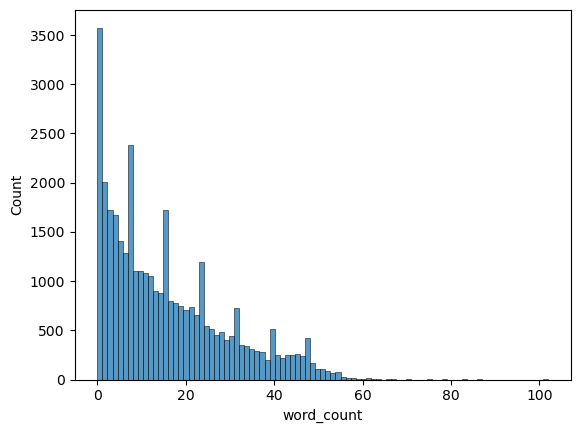

Número de instâncias por classe
sentiment
Positive    17999
Negative    17978
Name: count, dtype: int64

Histograma da distribuição das classes


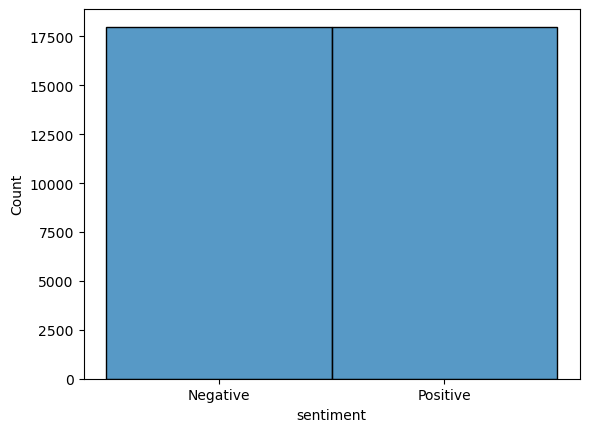


Gráfico de pizza da distribuição das classes


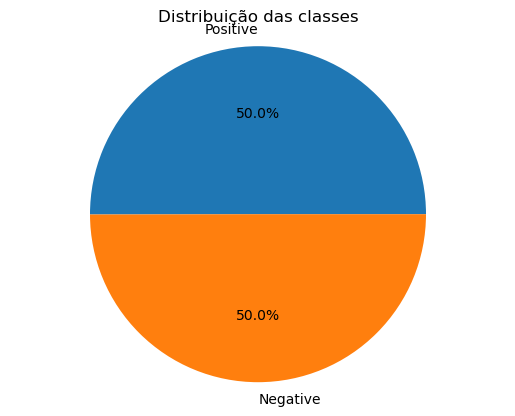


Palavras mais frequentes


,Palavra,Frequência
0,ped,14304
1,entreg,9629
2,aplic,8419
3,bom,7151
4,pag,6433
5,pra,5437
6,vez,5296
7,compr,5291
8,cupom,4830
9,opç,4702



Palavras mais frequentes para a classe Negative

Palavras mais frequentes


,Palavra,Frequência
0,ped,10086
1,entreg,5709
2,aplic,5190
3,pag,4547
4,compr,3698
5,pra,3681
6,faz,3276
7,vez,3272
8,cupom,2818
9,cancel,2648



Palavras mais frequentes para a classe Positive

Palavras mais frequentes


,Palavra,Frequência
0,bom,5025
1,ped,4218
2,entreg,3920
3,aplic,3229
4,melhor,2473
5,ótim,2243
6,opç,2188
7,vez,2024
8,cupom,2012
9,pod,1984



WordCloud


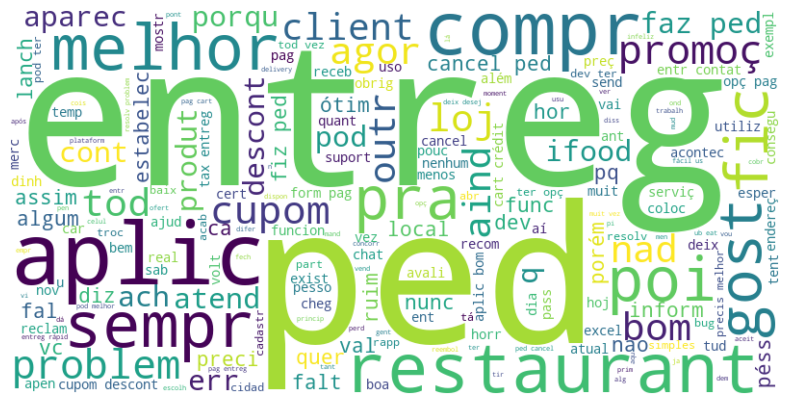

In [42]:
data_analytics(df, 'stemmed_tokens', 'sentiment')

In [43]:
def join_tokens(tokens):
  return ' '.join(tokens)

df['text_clean'] = df['tokens_without_stopwords'].apply(join_tokens)

/var/folders/z4/qjsljsws0c3bccyrhw2css6c0000gn/T/ipykernel_35980/3674456050.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_clean'] = df['tokens_without_stopwords'].apply(join_tokens)


/var/folders/z4/qjsljsws0c3bccyrhw2css6c0000gn/T/ipykernel_35980/3606722300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df[text_column].str.split().apply(len)


Número de nulos por coluna:

Unnamed: 0                        0
reviewId                          0
userName                          0
userImage                         0
content                           0
score                             0
thumbsUpCount                     0
reviewCreatedVersion           3361
at                                0
replyContent                  27016
repliedAt                     27016
appVersion                     3361
sortOrder                         0
appId                             0
word_count                        0
removed_emoji                     0
removed_links                     0
tokens                            0
tokens_lowercase                  0
tokens_without_punctuation        0
tokens_without_stopwords          0
stemmed_tokens                    0
sentiment                         0
text_clean                        0
dtype: int64 

O número mínimo de palavras no dataset é: 0
A média de palavras no dataset é: 15.76985296161

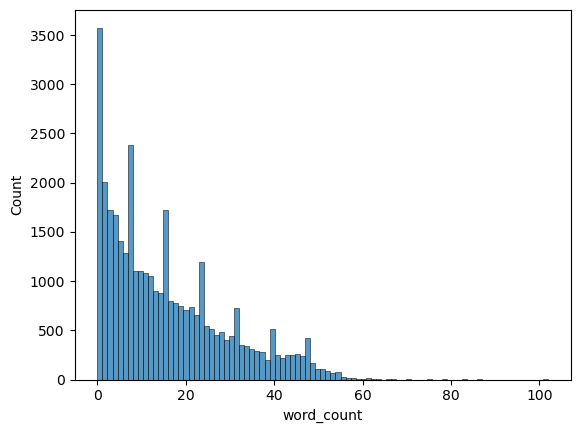

Número de instâncias por classe
sentiment
Positive    17999
Negative    17978
Name: count, dtype: int64

Histograma da distribuição das classes


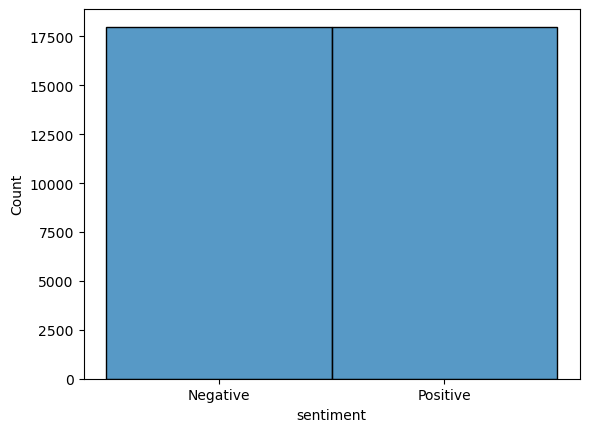


Gráfico de pizza da distribuição das classes


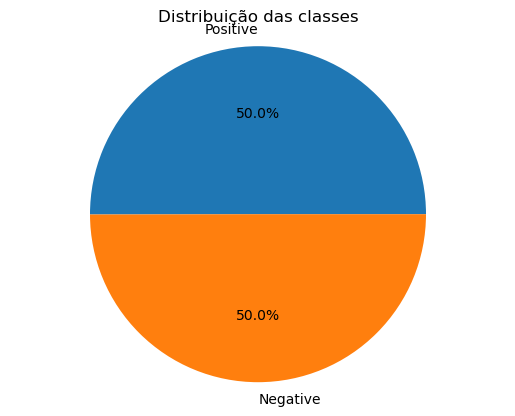


Palavras mais frequentes


,Palavra,Frequência
0,pedido,9165
1,aplicativo,7808
2,bom,6753
3,pra,5350
4,entrega,5009
5,sempre,3400
6,vezes,3394
7,...,3258
8,opção,3184
9,pagamento,3056



Palavras mais frequentes para a classe Negative

Palavras mais frequentes


,Palavra,Frequência
0,pedido,6689
1,aplicativo,4817
2,pra,3655
3,entrega,2794
4,pagamento,2114
5,fazer,2099
6,...,2088
7,cartão,2005
8,bom,1986
9,vezes,1950



Palavras mais frequentes para a classe Positive

Palavras mais frequentes


,Palavra,Frequência
0,bom,4767
1,aplicativo,2991
2,pedido,2476
3,entrega,2215
4,bem,1745
5,pra,1695
6,sempre,1695
7,ótimo,1644
8,vezes,1444
9,cupons,1384



WordCloud


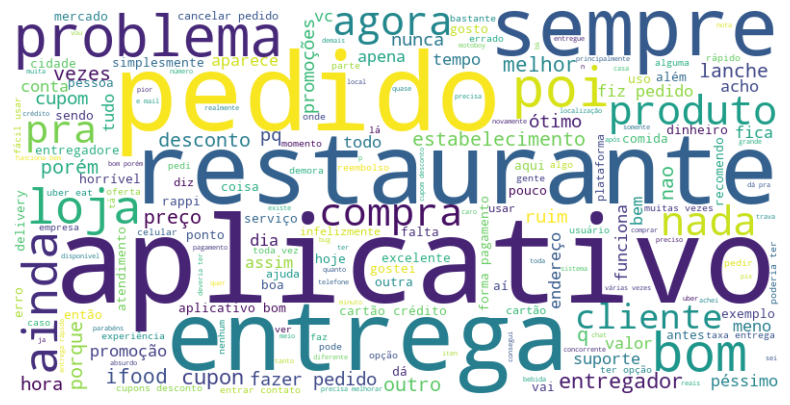

In [44]:
data_analytics(df, 'text_clean', 'sentiment')

In [45]:
df = df[df['word_count'] > 0]
df.drop(columns=['Unnamed: 0', 'reviewId', 'userName',
                 'userImage', 'thumbsUpCount', 'reviewCreatedVersion',
                 'at', 'replyContent', 'word_count', 'repliedAt', 'appVersion',
                 'sortOrder', 'appId'], inplace=True)

/var/folders/z4/qjsljsws0c3bccyrhw2css6c0000gn/T/ipykernel_35980/2277647087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Unnamed: 0', 'reviewId', 'userName',


In [46]:
df

,content,score,removed_emoji,removed_links,tokens,tokens_lowercase,tokens_without_punctuation,tokens_without_stopwords,stemmed_tokens,sentiment,text_clean
0,Fiz um pedido e veio com um item faltando. Ao ...,1,Fiz um pedido e veio com um item faltando. Ao ...,Fiz um pedido e veio com um item faltando. Ao ...,"[Fiz, um, pedido, e, veio, com, um, item, falt...","[fiz, um, pedido, e, veio, com, um, item, falt...","[fiz, um, pedido, e, veio, com, um, item, falt...","[fiz, pedido, veio, item, faltando, tentar, re...",fiz ped vei it falt tent report err aba `` aju...,Negative,fiz pedido veio item faltando tentar reportar ...
1,Informações do produto e imagens sem clareza. ...,1,Informações do produto e imagens sem clareza. ...,Informações do produto e imagens sem clareza. ...,"[Informações, do, produto, e, imagens, sem, cl...","[informações, do, produto, e, imagens, sem, cl...","[informações, do, produto, e, imagens, sem, cl...","[informações, produto, imagens, clareza, lojas...",inform produt imag clar loj ag cancel ped conv...,Negative,informações produto imagens clareza lojas agem...
2,"Uso o aplicativo a um bom tempo, porém, tive u...",1,"Uso o aplicativo a um bom tempo, porém, tive u...","Uso o aplicativo a um bom tempo, porém, tive u...","[Uso, o, aplicativo, a, um, bom, tempo, ,, por...","[uso, o, aplicativo, a, um, bom, tempo, ,, por...","[uso, o, aplicativo, a, um, bom, tempo, porém,...","[uso, aplicativo, bom, tempo, porém, problema,...",uso aplic bom temp porém problem ped recent do...,Negative,uso aplicativo bom tempo porém problema pedido...
3,Não tem mais preocupação com qualidade. Os ent...,1,Não tem mais preocupação com qualidade. Os ent...,Não tem mais preocupação com qualidade. Os ent...,"[Não, tem, mais, preocupação, com, qualidade, ...","[não, tem, mais, preocupação, com, qualidade, ...","[não, tem, mais, preocupação, com, qualidade, ...","[preocupação, qualidade, entregadores, atrasam...",preocup qual entreg atras demal entreg ped ain...,Negative,preocupação qualidade entregadores atrasam dem...
4,"Não aparece mais cupons, a mais de 7 meses par...",1,"Não aparece mais cupons, a mais de 7 meses par...","Não aparece mais cupons, a mais de 7 meses par...","[Não, aparece, mais, cupons, ,, a, mais, de, 7...","[não, aparece, mais, cupons, ,, a, mais, de, 7...","[não, aparece, mais, cupons, a, mais, de, 7, m...","[aparece, cupons, 7, meses, específico, restau...",aparec cupom 7 mes específ restaurant impõ pre...,Negative,aparece cupons 7 meses específico restaurantes...
...,...,...,...,...,...,...,...,...,...,...,...
35977,Muito bom amei esse app,5,Muito bom amei esse app,Muito bom amei esse app,"[Muito, bom, amei, esse, app]","[muito, bom, amei, esse, app]","[muito, bom, amei, esse, app]","[bom, amei]",bom ame,Positive,bom amei
35978,Muito bom,5,Muito bom,Muito bom,"[Muito, bom]","[muito, bom]","[muito, bom]",[bom],bom,Positive,bom
35979,Ótimo pra todo momento www.aiqfome.com,5,Ótimo pra todo momento www.aiqfome.com,Ótimo pra todo momento,"[Ótimo, pra, todo, momento]","[ótimo, pra, todo, momento]","[ótimo, pra, todo, momento]","[ótimo, pra, todo, momento]",ótim pra tod moment,Positive,ótimo pra todo momento
35980,Top 🤝🏻,5,Top,Top,[Top],[top],[top],[top],top,Positive,top


In [47]:
#df.to_csv('analise_delivery.csv', index=False)

## Representando os dados numericamente
___
#### Dividindo o conjunto de dados em treinamento e teste

In [48]:
seed = 42
x_train, x_test, y_train, y_test = train_test_split(df['stemmed_tokens'], df['sentiment'], test_size=0.3, stratify = df['sentiment'], random_state = seed)

/Users/data_science_br/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/data_science_br/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


## Bag of Words

In [49]:
bag_of_words = CountVectorizer()
x_train_num = bag_of_words.fit_transform(x_train)
x_test_num = bag_of_words.transform(x_test)

## Classificação
___
#### Treinamento e predição

In [50]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1)
knn.fit(x_train_num, y_train)

/Users/data_science_br/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/data_science_br/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


KNeighborsClassifier(metric='euclidean', n_jobs=-1)

In [51]:
y_pred = knn.predict(x_test_num)
y_pred

array(['Positive', 'Negative', 'Positive', ..., 'Positive', 'Negative',
       'Positive'], dtype=object)

## Avaliando modelo do conjunto teste

In [52]:
accuracy_score(y_pred, y_test)

/Users/data_science_br/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/data_science_br/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.7345724907063197

## Matriz de confusão

/Users/data_science_br/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/data_science_br/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


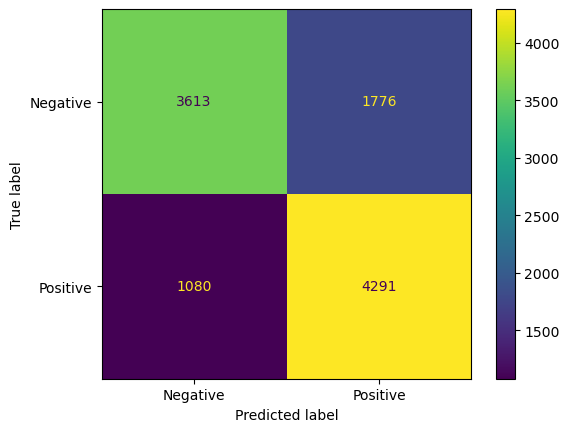

In [53]:
confusion = confusion_matrix(y_test, y_pred, labels=knn.classes_)
display_confusion = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=knn.classes_)
display_confusion.plot()

## Modelo Final

In [54]:
knn = KNeighborsClassifier(n_neighbors=50, weights='distance', metric='cosine', n_jobs=-1)
knn.fit(x_train_num, y_train)

/Users/data_science_br/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/data_science_br/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


KNeighborsClassifier(metric='cosine', n_jobs=-1, n_neighbors=50,
                     weights='distance')

In [55]:
y_pred = knn.predict(x_test_num)
y_pred

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Negative',
       'Negative'], dtype=object)

/Users/data_science_br/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/data_science_br/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


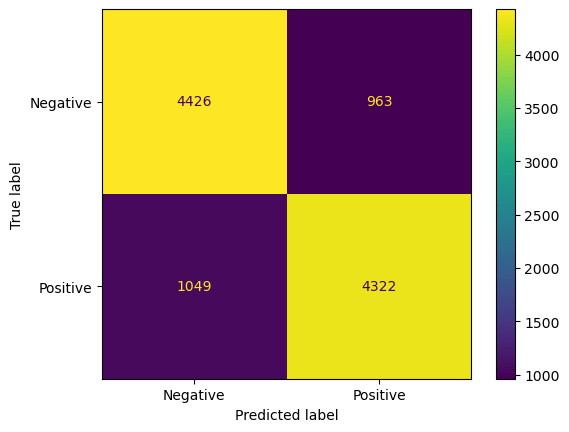

In [56]:
confusion = confusion_matrix(y_test, y_pred, labels=knn.classes_)
display_confusion = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=knn.classes_)
display_confusion.plot()

In [57]:
def classifierNewData(text):
    text = process_text(text)
    x = bag_of_words.transform([text])
    y = knn.predict(x)
    print(y)

In [58]:
classifierNewData('O aplicativo é muito satisfatório')

['Positive']


In [71]:
classifierNewData('O lanche estava muito gelado horrível, porém o aplicativo precisa melhorar muito')

['Negative']


In [62]:
classifierNewData('A batata é extremamente crocante e gostosa')

['Positive']
